<a href="https://colab.research.google.com/github/robiul-islam-rubel/Music-recomended-system/blob/main/Music_Recomended_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings("ignore")

# **Load necesarry datasets**

In [2]:
data = pd.read_csv('/content/data.csv')
genre_data = pd.read_csv('/content/data_by_genres.csv')
year_data = pd.read_csv('/content/data_by_year.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30197 entries, 0 to 30196
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           30197 non-null  float64
 1   year              30197 non-null  int64  
 2   acousticness      30197 non-null  float64
 3   artists           30197 non-null  object 
 4   danceability      30197 non-null  float64
 5   duration_ms       30197 non-null  int64  
 6   energy            30197 non-null  float64
 7   explicit          30197 non-null  int64  
 8   id                30197 non-null  object 
 9   instrumentalness  30197 non-null  float64
 10  key               30197 non-null  int64  
 11  liveness          30196 non-null  float64
 12  loudness          30196 non-null  float64
 13  mode              30196 non-null  float64
 14  name              30196 non-null  object 
 15  popularity        30196 non-null  float64
 16  release_date      30196 non-null  object

In [21]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1.0,Clancy Lowered the Boom,5.0,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1.0,Gati Bali,5.0,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1.0,Danny Boy,3.0,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1.0,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665


In [27]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [28]:
data = data.fillna(0)

In [29]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [30]:
data.shape

(30197, 19)

In [31]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,30197.000000,30197.000000,30197.000000,30197.000000,3.019700e+04,30197.000000,30197.000000,30197.000000,30197.000000,30197.000000,30197.000000,30197.000000,30197.000000,30197.000000,30197.000000
mean,0.549589,1964.236083,0.590272,0.548238,2.194622e+05,0.426517,0.071232,0.172655,5.203199,0.197641,-12.054532,0.716694,34.730503,0.101441,115.862249
std,0.254632,26.552707,0.370730,0.168293,1.134801e+05,0.254202,0.257217,0.319569,3.477465,0.158688,5.425730,0.450611,26.628025,0.173670,30.759245
min,0.000000,1921.000000,0.000000,0.000000,5.991000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350000,1942.000000,0.202000,0.431000,1.658400e+05,0.215000,0.000000,0.000000,2.000000,0.099400,-15.154000,0.000000,6.000000,0.035200,92.593000
50%,0.568000,1961.000000,0.718000,0.561000,1.949730e+05,0.389000,0.000000,0.000211,5.000000,0.136000,-11.476000,1.000000,39.000000,0.045400,113.761000
75%,0.759000,1983.000000,0.950000,0.674000,2.470400e+05,0.624000,0.000000,0.114000,8.000000,0.251000,-8.116000,1.000000,58.000000,0.075500,133.594000
max,1.000000,2020.000000,0.996000,0.988000,3.499774e+06,1.000000,1.000000,1.000000,11.000000,0.997000,0.878000,1.000000,100.000000,0.967000,243.372000


In [5]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [6]:
genre_data.shape

(2973, 14)

In [7]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [8]:
year_data.shape

(100, 14)

# **Feature Extraction**

In [32]:
from yellowbrick.target import FeatureCorrelation
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness','liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

In [33]:
X, y = data[feature_names], data['popularity']

In [34]:
# Create a list of the feature names
features = np.array(feature_names)

In [35]:
# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

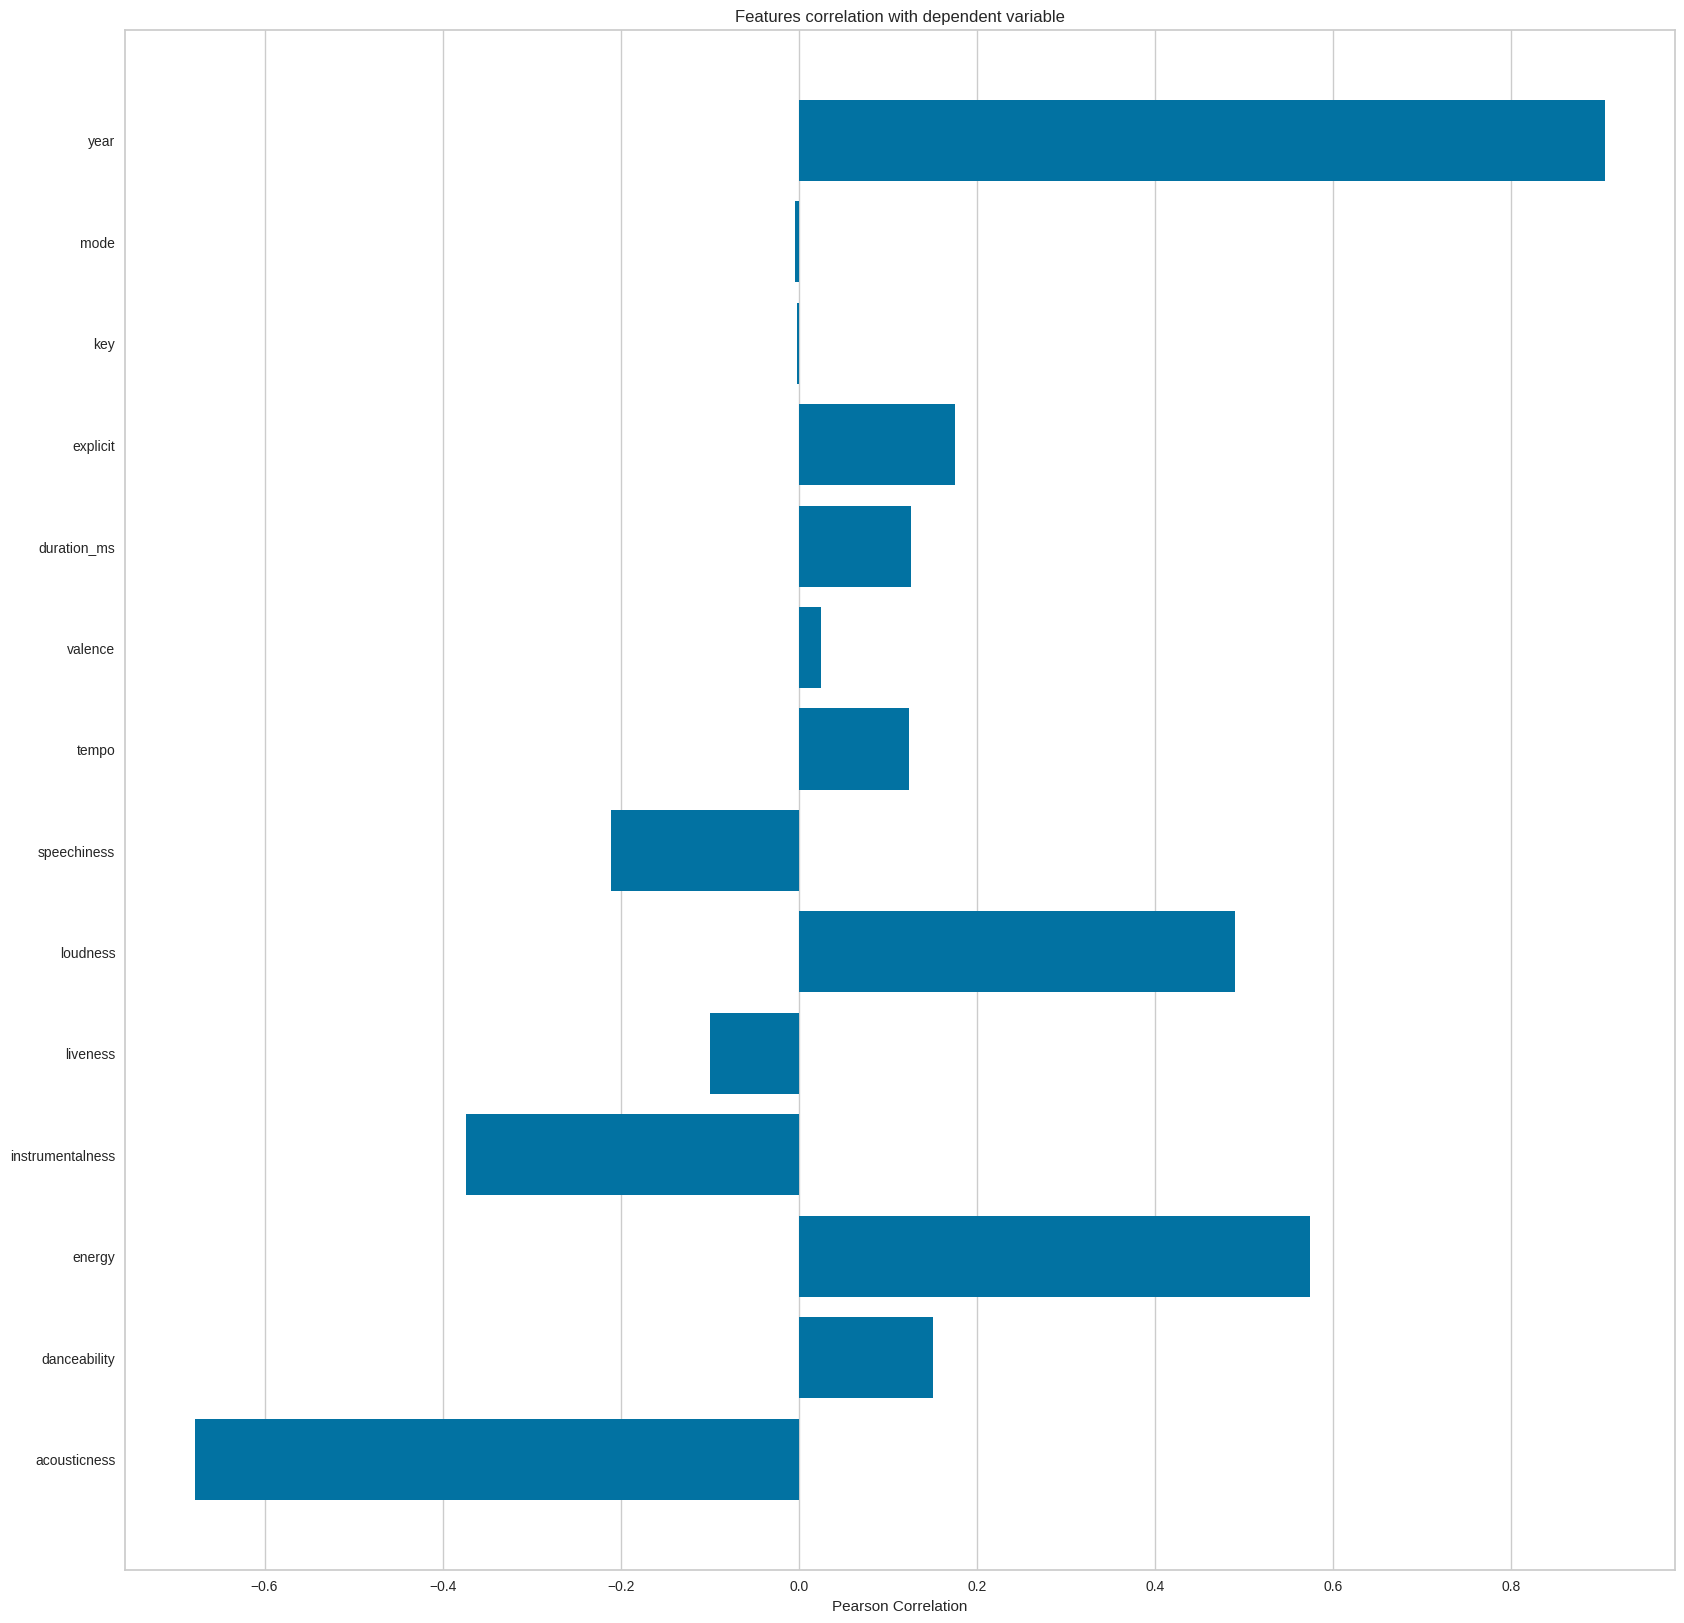

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [36]:
plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

<Axes: xlabel='count', ylabel='decade'>

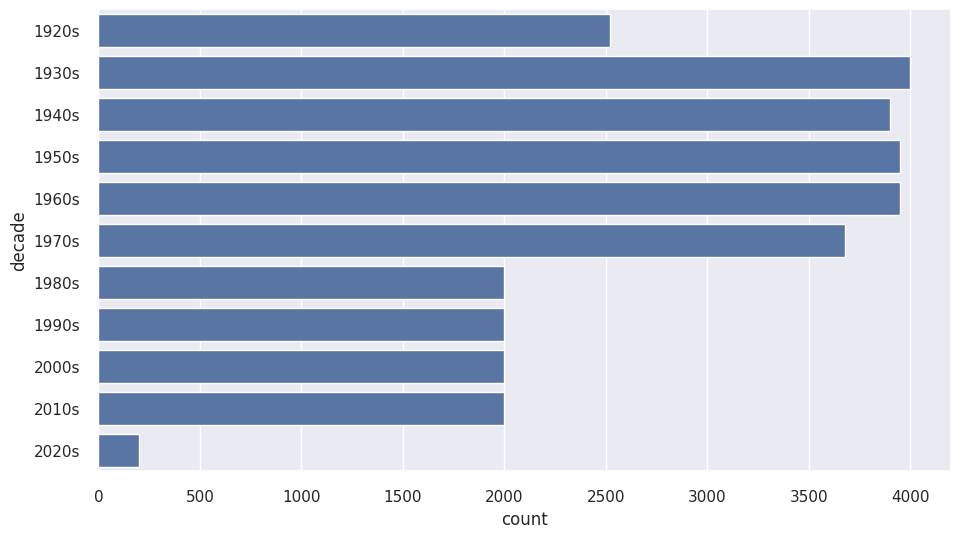

In [37]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

In [38]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

In [39]:
top10_genres = genre_data.nlargest(10, 'popularity')
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [41]:
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.012s...
[t-SNE] Computed neighbors for 2973 samples in 0.753s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106293
[t-SNE] KL divergence after 1000 iterations: 1.392991


In [42]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=20,
                                   verbose=False))
                                 ], verbose=False)

X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

In [43]:
# Visualizing the Clusters with PCA

from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

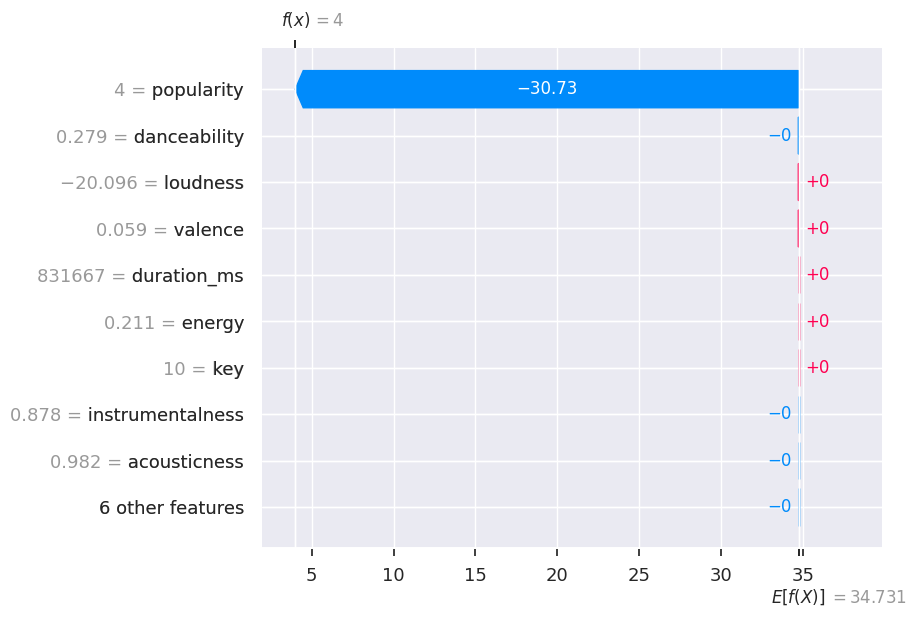

In [78]:
import xgboost
model = xgboost.XGBRegressor().fit(X, y)
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

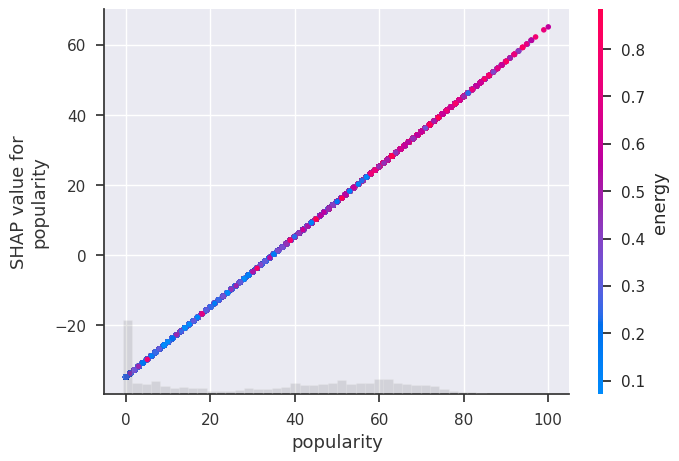

In [75]:
shap.plots.scatter(shap_values[:, "popularity"], color=shap_values)

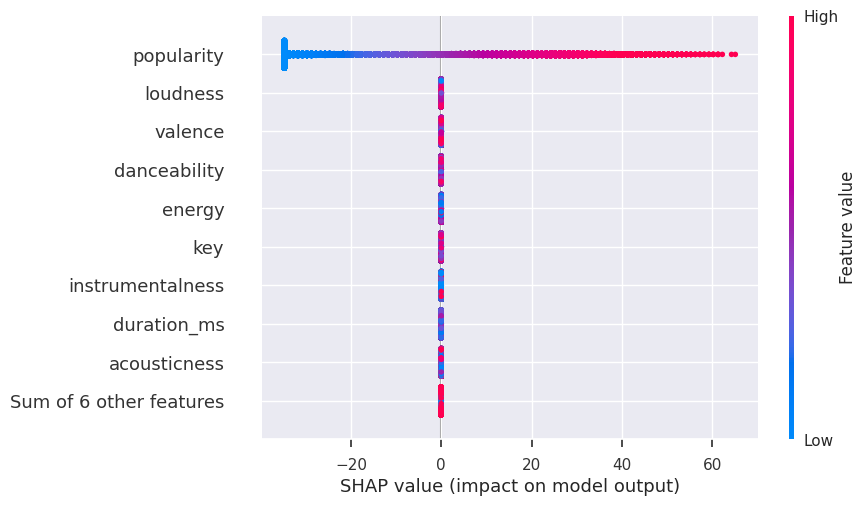

In [76]:
shap.plots.beeswarm(shap_values)

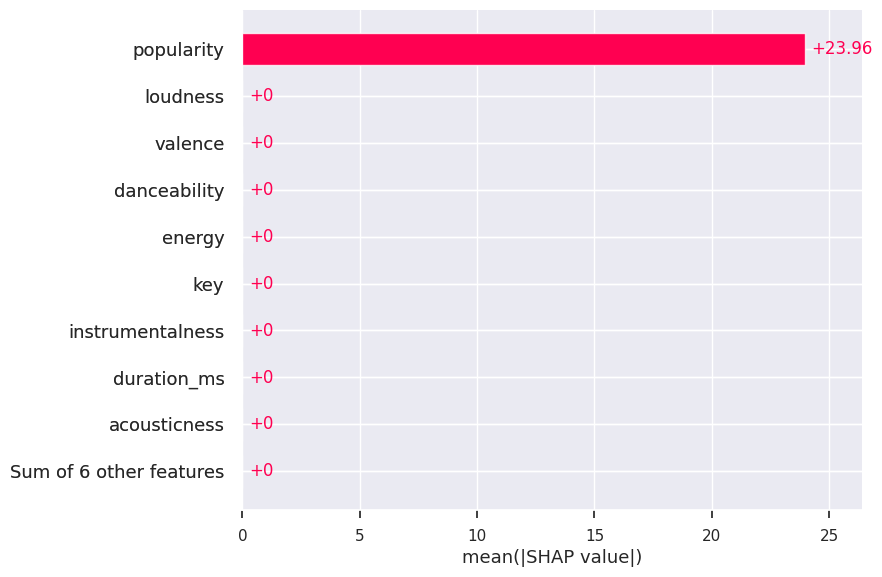

In [77]:
shap.plots.bar(shap_values)

# **Install Spotify**

In [58]:
!pip install spotipy

In order to getting the soptify client ID and Secret key you have to follow below steps:

1.   Go to https://developer.spotify.com/
2.   Create an App
1.   Save your cliend ID and Secret Key






In [45]:
# importing spotify and conncet with the environment variable
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

os.environ["SPOTIPY_CLIENT_ID"] = "Your_Client_ID"
os.environ["SPOTIPY_CLIENT_SECRET"] = "Your_Secret_Key"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials())

def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [46]:
# find the song with song name and year
def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [49]:
# importing necessary libraries
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

In [50]:
# getting data
def get_song_data(song, spotify_data):

    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data

    except IndexError:
        return find_song(song['name'], song['year'])


In [57]:
# vectorize
def get_mean_vector(song_list, spotify_data):

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

In [52]:
# list
def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict

In [53]:
# find the song
def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [58]:
# call the funciton with parameters
recommend_songs([{'name': 'Come As You Are', 'year':1991},
                {'name': 'Smells Like Teen Spirit', 'year': 1991}],  data)

[{'name': 'Hail to the King',
  'year': 2013,
  'artists': "['Avenged Sevenfold']"},
 {'name': 'No Excuses', 'year': 1994, 'artists': "['Alice In Chains']"},
 {'name': 'Dragula', 'year': 1998, 'artists': "['Rob Zombie']"},
 {'name': 'Fuel', 'year': 1997, 'artists': "['Metallica']"},
 {'name': 'Welcome to the Family',
  'year': 2010,
  'artists': "['Avenged Sevenfold']"},
 {'name': 'Cemetery Drive',
  'year': 2004,
  'artists': "['My Chemical Romance']"},
 {'name': 'Otherside', 'year': 1999, 'artists': "['Red Hot Chili Peppers']"},
 {'name': '7 Things - Single Version',
  'year': 2008,
  'artists': "['Miley Cyrus']"}]

# **Reference**
https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset/notebook